
# Motor Imagery Left/Right Classification Using Machine Learning
## BCI-4-ALS, Ben Gurion University, 2020
## Evyatar Luvaton, Noam Siegel

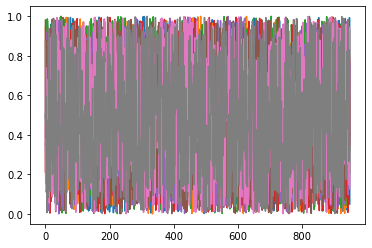

In [14]:
import numpy as np
import pyxdf
import matplotlib.pyplot as plt


filename = "sub-P001_ses-S001_task-Default_run-001_eeg_old3.xdf"

data, header = pyxdf.load_xdf(filename)
time_series = data[0]['time_series']
plt.plot(time_series)

In [6]:
data

[{'info': defaultdict(list,
              {'name': ['BioSemi'],
               'type': ['EEG'],
               'channel_count': ['8'],
               'channel_format': ['float32'],
               'source_id': ['myuid34234'],
               'nominal_srate': ['100.0000000000000'],
               'version': ['1.100000000000000'],
               'created_at': ['129914.3243274000'],
               'uid': ['4ca50122-390d-4ef5-abbb-d93ce789c366'],
               'session_id': ['default'],
               'hostname': ['DESKTOP-32EF3H2'],
               'v4address': [None],
               'v4data_port': ['16572'],
               'v4service_port': ['16572'],
               'v6address': [None],
               'v6data_port': ['16572'],
               'v6service_port': ['16572'],
               'desc': [None],
               'stream_id': 1,
               'effective_srate': 94.96250110112334}),
  'footer': {'info': defaultdict(list,
               {'first_timestamp': ['129949.7304534'],
            

{'info': defaultdict(list,
             {'version': ['1.0'], 'datetime': ['2020-12-16T23:18:14+0200']})}